In [8]:
import sys
sys.path.insert(0, '..')
import os
import glob
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload

In [9]:
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

In [10]:
m = Basemap(projection='ortho',lon_0=-152.,lat_0=10,resolution='c')
mpol = Basemap(projection='npstere', boundinglat=60, lon_0=0, resolution='l')
mpol2 = Basemap(projection='npstere', boundinglat=-60, lon_0=0, resolution='l')

In [11]:
datafile = "/data/SST/CapeGhir/T20001732018263.L3m_SCSU_NSST_sst_4km.nc"
datafile = "/data/OceanColor/yearly/TERRA_MODIS.20190101_20191231.L3m.YR.SST4.sst4.4km.nc"
figdir = "../figures/SST/"
os.path.exists(datafile)

True

In [12]:
sstglobal = filament.SST()
sstglobal.read_from_oceancolorL3(datafile)

### Projection

In [13]:
llon, llat = np.meshgrid(sstglobal.lon, sstglobal.lat)
lonp, latp = m(llon, llat)
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

Find max SST

In [93]:
maxsst = sstglobal.field.max()
indsst = np.where(sstglobal.field==maxsst)
indlon = indsst[1][0]
indlat = indsst[0][0]
indlon, indlat

(1581, 1335)

In [14]:
NN = 10
fig = plt.figure(figsize=(10, 10))
m.drawcoastlines(linewidth=.2)
m.pcolormesh(lonp[::NN], latp[::NN], sstglobal.field[::NN], 
             zorder=3, vmin=5., vmax=33., cmap=plt.cm.RdYlBu_r)


t1 = plt.text(lonp[indlat, indlon], latp[indlat, indlon], "\uf3c5", 
            fontproperties=fp1,
            fontsize=18, ha="center", va="bottom", zorder=7, color="w")

# m.fillcontinents(color='grey')
cb = plt.colorbar(extend="both", shrink=.7)
cb.set_label("$^{\circ}$C", rotation=0, ha="left")
m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
m.drawcoastlines()
#plt.savefig(os.path.join(figdir, "SST_2019_max"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

NameError: name 'indlat' is not defined

## Zoom on the warmer region

In [102]:
mz = Basemap(epsg=4326,
            llcrnrlon=sstglobal.lon[indlon] - 4., llcrnrlat=sstglobal.lat[indlat] - 4.,
            urcrnrlon=sstglobal.lon[indlon] + 4., urcrnrlat=sstglobal.lat[indlat] + 4.,
            lat_ts=sstglobal.lat[indlat], resolution='f')

In [103]:
lonp2, latp2 = mz(llon, llat)
#lonp2[lonp2==lonp2.max()] = np.nan
#latp2[latp2==latp2.max()] = np.nan

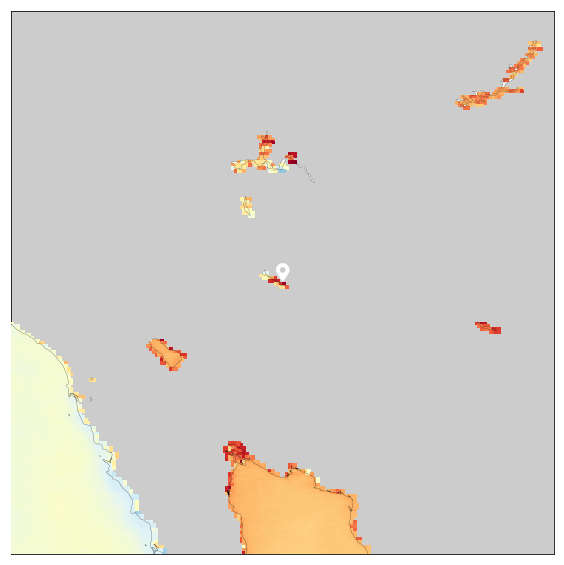

In [104]:
NN = 1
fig = plt.figure(figsize=(10, 10))
mz.drawcoastlines(linewidth=.2, zorder=5)
mz.fillcontinents()
mz.pcolormesh(lonp2[::NN], latp2[::NN], sstglobal.field[::NN], 
             zorder=3, vmin=5., vmax=33., cmap=plt.cm.RdYlBu_r)

t1 = plt.text(lonp2[indlat, indlon], latp2[indlat, indlon], "\uf3c5", 
            fontproperties=fp1,
            fontsize=18, ha="center", va="bottom", zorder=7, color="w")
plt.savefig(os.path.join(figdir, "SST_2019_max2"), dpi=300, bbox_inches="tight")

plt.show()
plt.close()

In [100]:
mz.is_land?